# Data Science Immersive - General Assembly 
## Capstone Project
Harsha Goonewardana <br>
Today

 #### This notebook will use a number for regression models to infer feature importance

In [4]:
import pandas as pd
import os
import re
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = None

from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pickle

In [5]:
from xgboost.sklearn import XGBRegressor 

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

from sklearn.metrics import mean_squared_error,r2_score

In [6]:
df=pd.read_pickle('./data/NYCdum.pkl')

In [7]:
df.head()

,number_of_reviews,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,security_deposit,host_since,latitude,longitude,ppl_bath,guest_prop,bnb_yield,DateDiffHostSince,dist_transit,property_type_Apartment,property_type_Condominium,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,host_is_superhost_f,host_is_superhost_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,bed_type_OTHER,bed_type_Real Bed
0,168.0,3.0,1.0,1.0,2.0,119.0,2.0,39.0,2.0,0.0,2008-09-06,40.799205,-73.953676,0.5,0.666667,17425.408,3601.0,0.115468,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
1,7.0,4.0,1.0,2.0,3.0,104.0,1.0,25.0,1.0,100.0,2008-09-07,40.647486,-73.972370,1.0,0.250000,2449.408,3600.0,0.392200,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1
2,32.0,2.0,1.0,0.0,1.0,325.0,2.0,0.0,1.0,350.0,2008-09-09,40.753621,-73.983774,0.5,1.000000,10316.800,3598.0,0.085077,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,32.0,2.0,1.0,1.0,1.0,195.0,2.0,50.0,5.0,150.0,2008-11-09,40.708558,-73.942362,0.5,1.000000,6190.080,3537.0,0.216335,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
4,198.0,3.0,1.0,1.0,3.0,89.0,1.0,0.0,1.0,500.0,2008-12-07,40.685138,-73.959757,1.0,0.333333,40282.112,3509.0,0.403653,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1


#### Establish the baseline using mean 

In [8]:
print('The baseline measure for bnb_yield is {}'.format (df.bnb_yield.mean()))
print('')
print('The baseline measure for price is {}'.format (df.price.mean()))

The baseline measure for bnb_yield is 24159.42116242619

The baseline measure for price is 178.6024154589372


### Simple Linear Regression

In [14]:
# as the X variable does not change, both explanatory variables were seperated at the same time
X = df.drop(['price','bnb_yield','host_since'], axis=1)
y = df['bnb_yield']
y_p = df['price']

In [15]:
X.columns

Index(['number_of_reviews', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'guests_included', 'extra_people', 'minimum_nights', 'security_deposit',
       'latitude', 'longitude', 'ppl_bath', 'guest_prop', 'DateDiffHostSince',
       'dist_transit', 'property_type_Apartment', 'property_type_Condominium',
       'property_type_House', 'property_type_Loft', 'property_type_Other',
       'property_type_Townhouse', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room',
       'host_is_superhost_f', 'host_is_superhost_t',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict',
       'cancellation_policy_strict_14_with_grace_period',
       'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60', 'bed_type_OTHER',
       'bed_type_Real Bed'],
      dtype='object')

#### Yield as the dependant variable

In [16]:
X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=0.2, random_state=42,)
print('Shapes')
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

Shapes
X_train: (29808, 34)
X_test: (7452, 34)
y_train: (29808,)
y_test: (7452,)


In [17]:
X_train.columns

Index(['number_of_reviews', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'guests_included', 'extra_people', 'minimum_nights', 'security_deposit',
       'latitude', 'longitude', 'ppl_bath', 'guest_prop', 'DateDiffHostSince',
       'dist_transit', 'property_type_Apartment', 'property_type_Condominium',
       'property_type_House', 'property_type_Loft', 'property_type_Other',
       'property_type_Townhouse', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room',
       'host_is_superhost_f', 'host_is_superhost_t',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict',
       'cancellation_policy_strict_14_with_grace_period',
       'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60', 'bed_type_OTHER',
       'bed_type_Real Bed'],
      dtype='object')

In [18]:
ss = StandardScaler()

#scale and transform the predictive dataset in both test and train forms
X_train_s= ss.fit_transform(X_train) # saved the mean and std from X_train
X_test_s=ss.transform(X_test)


In [25]:
# Linear regression
lr = LinearRegression()

# Train the model using the training sets
lr.fit(X_train_s, y_train)
lr_y_pred = lr.predict(X_test_s)
print("Lr train score :")
print(lr.score(X_train_s, y_train))
print('')
print("Lr test score  :")

print(lr.score(X_test_s, y_test))
print('')
print("MSE: %.2f" % mean_squared_error(y_test, lr_y_pred))
print('')
price_value = mean_squared_error(y_test, lr_y_pred)
print("Error : %.2f" % np.sqrt(price_value))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, lr_y_pred))

Lr train score :
0.43250949279565465

Lr test score  :
0.4074591089350863

MSE: 752910997.12

Error : 27439.22
Variance score: 0.41


This is a very low score 

#### Price

In [20]:
X_train_p, X_test_p, y_train_p, y_test_p =train_test_split(X, y_p,test_size=0.2, random_state=42,)
print('Shapes')
print('X_train:', X_train_p.shape)
print('X_test:', X_test_p.shape)
print('y_train:', y_train_p.shape)
print('y_test:', y_test_p.shape)

Shapes
X_train: (29808, 34)
X_test: (7452, 34)
y_train: (29808,)
y_test: (7452,)


In [21]:
from sklearn import linear_model

In [22]:
ss_1 = StandardScaler()

#scale and transform the predictive dataset in both test and train forms
X_train_sp= ss_1.fit_transform(X_train_p) # saved the mean and std from X_train
X_test_sp=ss_1.transform(X_test_p)


In [23]:
# Create linear regression object
lr = LinearRegression()

# Train the model using the training sets
lr.fit(X_train_sp, y_train_p)
lr_y_pred = lr.predict(X_test_sp)
print("Lr train score :")
print(lr.score(X_train_sp, y_train_p))
print('')
print("Lr test score  :")

print(lr.score(X_test_sp, y_test_p))
print('')
print("MSE: %.2f" % mean_squared_error(y_test_p, lr_y_pred))
print('')
price_value = mean_squared_error(y_test_p, lr_y_pred)
print("Error : %.2f" % np.sqrt(price_value))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test_p, lr_y_pred))

Lr train score :
0.5659703903710047

Lr test score  :
0.5634618933619608

MSE: 7457.74

Error : 86.36
Variance score: 0.56


Price by itself seems to have be a better signal than yield

#### Advanced Regression

#### Ridge model with parameter tuning  

#### Yield

In [26]:
#Use Ridge regularization to keep the same number of features, but reduce the magnitude of the coefficients
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=5)
optimal_ridge.fit(X_train_s, y_train)
ridge_y_pred = optimal_ridge.predict(X_test_s)
print("Ridge train score :")
print(optimal_ridge.score(X_train_s, y_train))
print('')
print("Ridge test score  :")
print(optimal_ridge.score(X_test_s, y_test))

price_value = mean_squared_error(y_test, ridge_y_pred)
print("\n Mean squared error: %.2f" % mean_squared_error(y_test, ridge_y_pred))

print("\n Error : %.2f" % np.sqrt(price_value))
# Explained variance score: 1 is perfect prediction
print('\n Variance score: %.2f' % r2_score(y_test, ridge_y_pred))


Ridge train score :
0.43183655733816284

Ridge test score  :
0.40708624700268203

 Mean squared error: 753384773.46

 Error : 27447.86

 Variance score: 0.41


In [28]:
#Use Ridge regularization to keep the same number of features, but reduce the magnitude of the coefficients
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=5)
optimal_ridge.fit(X_train_sp, y_train_p)
ridge_y_pred = optimal_ridge.predict(X_test_sp)
print("Ridge train score :")
print(optimal_ridge.score(X_train_sp, y_train_p))
print('')
print("Ridge test score  :")
print(optimal_ridge.score(X_test_sp, y_test_p))

price_value = mean_squared_error(y_test_p, ridge_y_pred)
print("MSE: %.2f" % mean_squared_error(y_test_p, ridge_y_pred))

print("Error : %.2f" % np.sqrt(price_value))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test_p, ridge_y_pred))


Ridge train score :
0.5657273032612575

Ridge test score  :
0.563258681427194
MSE: 7461.21
Error : 86.38
Variance score: 0.56


### Yield 

In [32]:
l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=5,
                            verbose=0)
optimal_enet.fit(X_train_s, y_train)

enet_y_pred = optimal_enet.predict(X_test_s)
print("Enet train score :")
print(optimal_ridge.score(X_train_s, y_train))
print('')
print("Enet test score  :")
print(optimal_enet.score(X_test_s, y_test))

price_value = mean_squared_error(y_test, enet_y_pred)
print("MSE: %.2f" % price_value)

print("Error : %.2f" % np.sqrt(price_value))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test_p, enet_y_pred))


Enet train score :
-0.44400513714693535

Enet test score  :
0.4073416117585964
MSE: 753060294.70
Error : 27441.94
Variance score: -65693.69


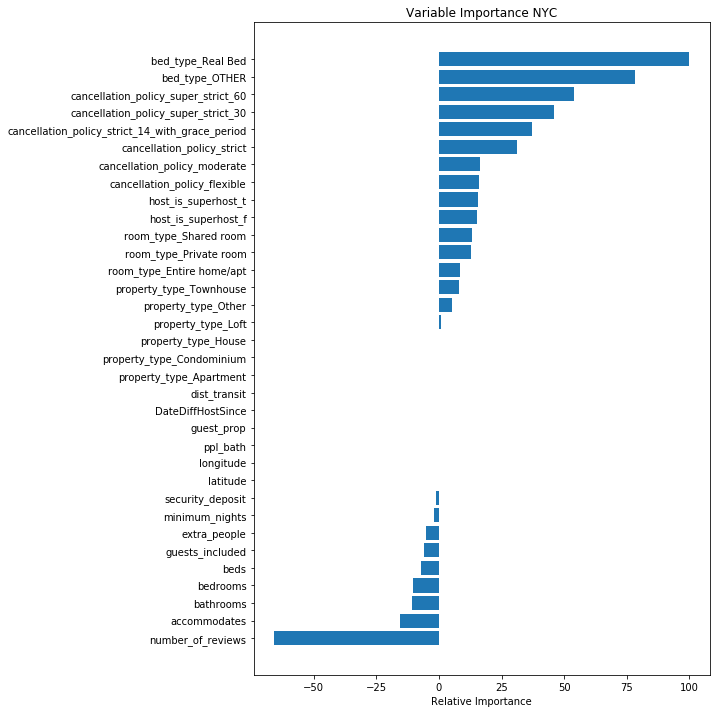

In [31]:
#attrib: https://github.com/springcoil/Inside_AirBnb_Hacks/blob/master/airbnb_prediction.ipynb
# Plot feature importance
plt.figure(figsize=(18,12))
names = X.columns.tolist()
feature_importance = optimal_enet.coef_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, names)
plt.xlabel('Relative Importance')
plt.title('Variable Importance NYC')
plt.show()

lr.intercept_

In [42]:
list(zip(X_test.columns, optimal_enet.coef_))

[('number_of_reviews', 12778.456794496224),
 ('accommodates', 9770.118397083044),
 ('bathrooms', 480.7442201634786),
 ('bedrooms', 819.9994138212808),
 ('beds', 1587.5924623301144),
 ('guests_included', 1592.073931524542),
 ('extra_people', 600.8544877863666),
 ('minimum_nights', -126.56387319560793),
 ('security_deposit', 73.96064758846526),
 ('latitude', 1680.2447807646863),
 ('longitude', -4044.426306060898),
 ('ppl_bath', 109.44872740915696),
 ('guest_prop', 1766.5594515123203),
 ('DateDiffHostSince', -8590.255026806253),
 ('dist_transit', -701.9540672076258),
 ('property_type_Apartment', -0.0),
 ('property_type_Condominium', 852.417957592509),
 ('property_type_House', -1105.4064966949943),
 ('property_type_Loft', 1123.852936217006),
 ('property_type_Other', 417.18324543341026),
 ('property_type_Townhouse', -249.34250623877057),
 ('room_type_Entire home/apt', 3354.0625620366905),
 ('room_type_Private room', -0.0),
 ('room_type_Shared room', -414.4883130664928),
 ('host_is_superhost

In [43]:

import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

params = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}

xgb = XGBRegressor(nthreads=-1)  

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [57]:
xgb_cv = RandomizedSearchCV(xgb, params, cv=5,n_jobs=1)
xgb_cv.fit(X_train_s, y_train)

xgb_y_pred = xgb_cv.predict(X_test_s)

# The train score
print("Train Score: %.2f" % xgb_cv.score(X_train_s, y_train))

# The test score
print("Test Score: %.2f" % xgb_cv.score(X_test_s, y_test))

price_value = mean_squared_error(y_test, xgb_y_pred)
print("MSE: %.2f" % price_value)

print("Error : %.2f" % np.sqrt(price_value))



# Explained variance score: 1 is perfect prediction
print('Test_Score: %.2f' % r2_score(y_test_p, xgb_y_pred))
# Best params
print("Tuned Model Parameters: {}".format(xgb_cv.best_params_))

Train Score: 0.70
Test Score: 0.62
MSE: 478901432.32
Error : 21883.82
Test_Score: -80279.45
Tuned Model Parameters: {'colsample_bytree': 0.9588800481126444, 'gamma': 9.653782733430408, 'learning_rate': 0.3575990245027289, 'max_depth': 8, 'min_child_weight': 88.86700302929117, 'n_estimators': 20, 'reg_alpha': 2.7574918111218043, 'subsample': 0.9754544624796435}


In [46]:
xgb_cv = RandomizedSearchCV(xgb, params, cv=5,n_jobs=1)
xgb_cv.fit(X_train_sp, y_train_p)

xgb_y_pred = xgb_cv.predict(X_test_sp)

# The train score
print("Train Score: %.2f" % xgb_cv.score(X_train_sp, y_train_p))

# The test score
print("Test Score: %.2f" % xgb_cv.score(X_test_sp, y_test_p))

price_value = mean_squared_error(y_test_p, xgb_y_pred)
print("MSE: %.2f" % price_value)

print("Error : %.2f" % np.sqrt(price_value))



# Explained variance score: 1 is perfect prediction
print('Test_Score: %.2f' % r2_score(y_test_p, xgb_y_pred))
# Best params
print("Tuned Model Parameters: {}".format(xgb_cv.best_params_))

Train Score: 0.84
Test Score: 0.70
MSE: 5058.61
Error : 71.12
Test_Score: 0.70
Tuned Model Parameters: {'colsample_bytree': 0.994491623591146, 'gamma': 2.6897757151708213, 'learning_rate': 0.15588658625852608, 'max_depth': 37, 'min_child_weight': 35.44318769130126, 'n_estimators': 31, 'reg_alpha': 12.027891241452048, 'subsample': 0.9637123264136668}


In [49]:
xgb_cv.best_params_

{'colsample_bytree': 0.994491623591146,
 'gamma': 2.6897757151708213,
 'learning_rate': 0.15588658625852608,
 'max_depth': 37,
 'min_child_weight': 35.44318769130126,
 'n_estimators': 31,
 'reg_alpha': 12.027891241452048,
 'subsample': 0.9637123264136668}

In [55]:
xgb= XGBRegressor(colsample_bytree = 0.994491623591146, gamma = 2.6897757151708213, 
                  learning_rate = 0.15588658625852608, max_depth = 37, 
                  min_child_weight = 43.37178810715322, n_estimators = 31, 
                  reg_alpha = 12.027891241452048, subsample = 0.9637123264136668)
xgb.fit(X_train_s, y_train)
xgb_y_pred = xgb.predict(X_test_s)

# The train score
print("Train Score: %.2f" % xgb.score(X_train_s, y_train))

# The test score
print("Test Score: %.2f" % xgb.score(X_test_s, y_test_p))

price_value = mean_squared_error(y_test_p, xgb_y_pred)
print("MSE: %.2f" % price_value)

print("Error : %.2f" % np.sqrt(price_value))



# Explained variance score: 1 is perfect prediction
print('Test_Score: %.2f' % r2_score(y_test_p, xgb_y_pred))


Train Score: 0.82
Test Score: 0.70
MSE: 5089.33
Error : 71.34
Test_Score: 0.70


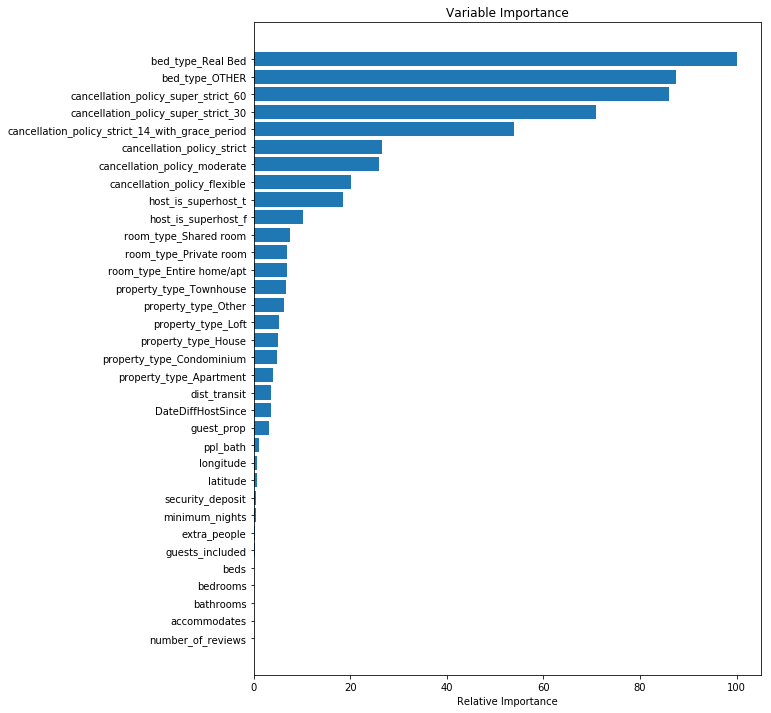

In [56]:
# Plot feature importance
plt.figure(figsize=(20,12))
xgb.fit(X_train_s,y_train)
feature_importance = xgb.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, names)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [58]:
#run Tpot

from tpot import TPOTRegressor
# from sklearn.model_selection import train_test_split
# X = set_num.drop('yield',axis=1)
# y = set_num['yield']
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     train_size=0.75, test_size=0.25)

tpot = TPOTRegressor(generations=3, population_size=50, verbosity=2,n_jobs=-1)
tpot.fit(X_train_sp, y_train_p)
print(tpot.score(X_train_sp, y_train_p))
print(tpot.score(X_test_sp, y_test_p))
tpot.export('tpot_airBnb_pipeline.py')

Optimization Progress:  50%|█████     | 100/200 [4:18:06<12:06:02, 435.62s/pipeline] 

Generation 1 - Current best internal CV score: -5818.430840100811


Optimization Progress:  76%|███████▌  | 152/200 [4:37:42<34:13, 42.79s/pipeline]    

Generation 2 - Current best internal CV score: -5757.8917086915435


Generation 3 - Current best internal CV score: -5687.157007483058

Best pipeline: RandomForestRegressor(ExtraTreesRegressor(input_matrix, bootstrap=True, max_features=1.0, min_samples_leaf=3, min_samples_split=15, n_estimators=100), bootstrap=False, max_features=0.15000000000000002, min_samples_leaf=2, min_samples_split=9, n_estimators=100)
-1055.0327840498617
-5104.245441375249


True